<h2 style="text-align: center;">Generalized method of moments</h2>


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import comb  # For binomial coefficients


In [2]:
class Vasicek:
    def __init__(self, kappa, theta, sigma):
        """
        Initialise les paramètres du modèle de Vasicek.
        
        :param kappa: vitesse de réversion vers la moyenne
        :param theta: niveau de la moyenne à long terme
        :param sigma: volatilité du processus
        """
        self.kappa = kappa
        self.theta = theta
        self.sigma = sigma

    def generate(self, X0, N, n):
        """
        Génère N trajectoires du processus Vasicek sur [0, 1] avec un pas de 1/n.
        
        :param X0: valeur initiale du processus
        :param N: nombre de trajectoires à générer
        :param n: nombre de pas de discrétisation (soit 1/n pour le pas de temps)
        
        :return: tableau de N trajectoires discrétisées du processus Vasicek
        """
        dt = 1 / n  # Pas de temps
        trajectories = np.zeros((N, n))  # Matrice pour stocker les trajectoires
        trajectories[:, 0] = X0  # Initialisation de toutes les trajectoires à X0

        for i in range(1, n):
            # Génération de bruit blanc standard
            Z = np.random.randn(N)  # Un bruit normal standard pour chaque trajectoire
            # Calcul de la prochaine valeur selon le modèle de Vasicek
            trajectories[:, i] = (
                trajectories[:, i - 1] * np.exp(-self.kappa * dt)
                + self.theta * (1 - np.exp(-self.kappa * dt))
                + self.sigma * np.sqrt((1 - np.exp(-2 * self.kappa * dt)) / (2 * self.kappa)) * Z
            )

        return trajectories

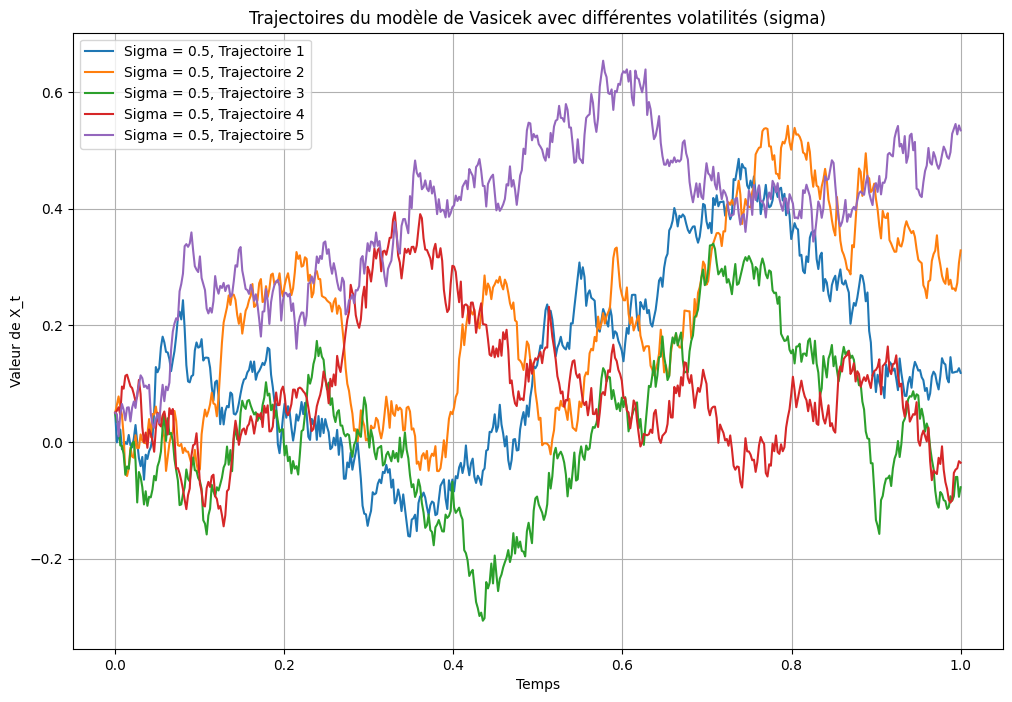

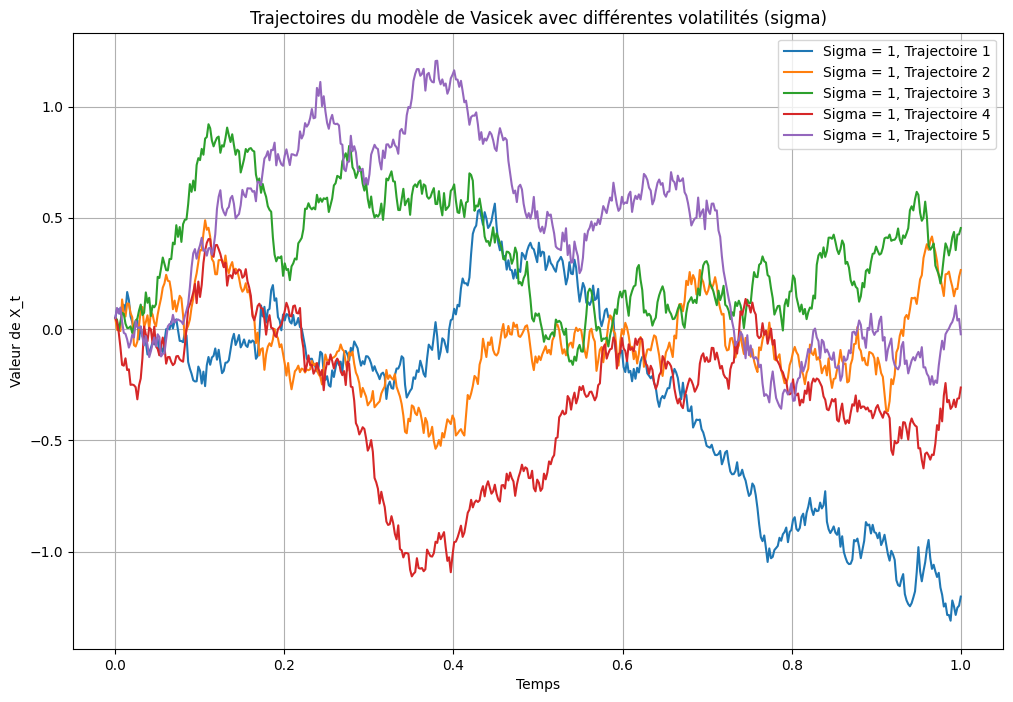

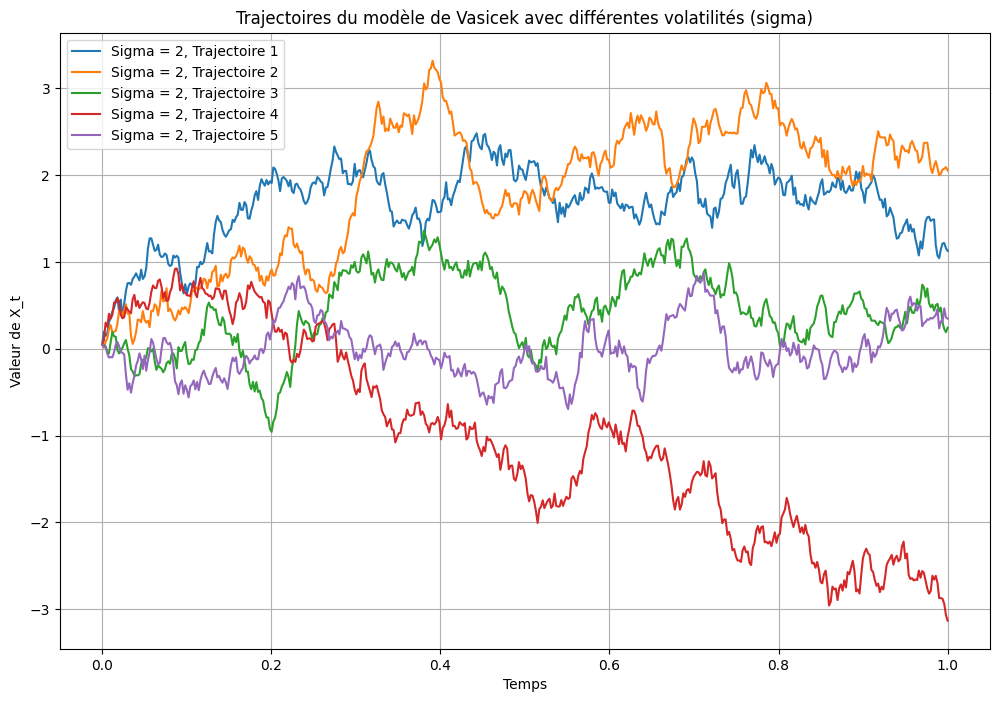

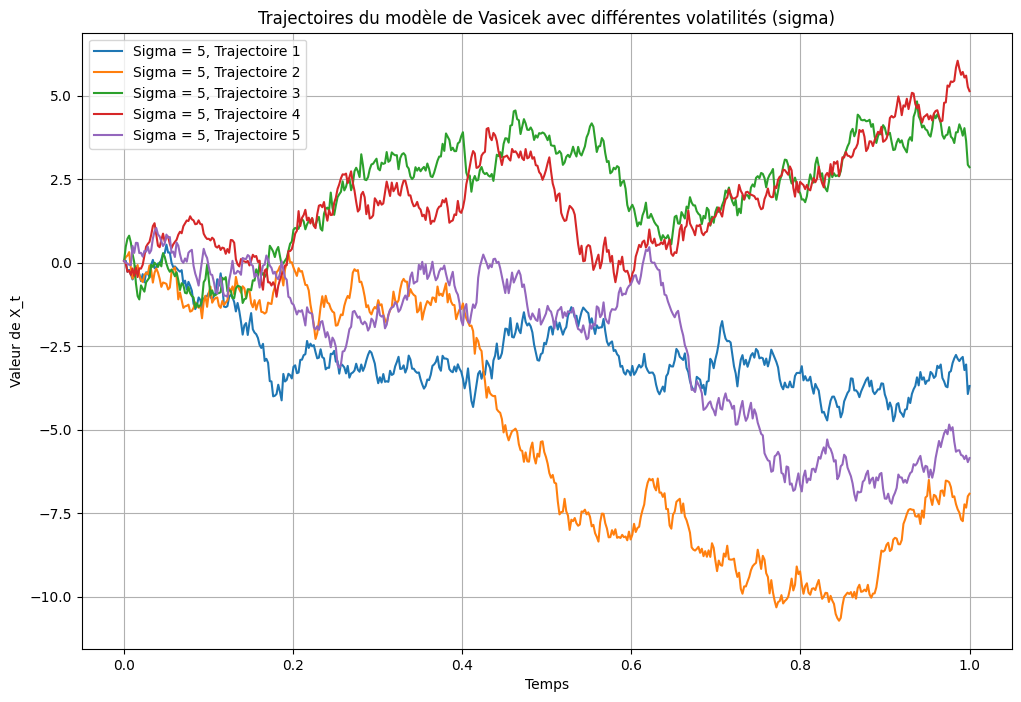

In [4]:


# Paramètres du modèle de Vasicek
kappa = 1  # vitesse de réversion vers la moyenne
theta = 0  # niveau de la moyenne à long terme
X0 = 0.05  # valeur initiale
N = 5  # nombre de trajectoires à générer
n = 500  # nombre de pas de discrétisation

# Liste des valeurs de sigma
sigma_values = [0.5, 1, 2, 5]

# Créer un objet de la classe Vasicek et générer les trajectoires pour chaque valeur de sigma


for sigma in sigma_values:
    # Créer un objet avec la valeur de sigma courante
    plt.figure(figsize=(12, 8))
    vasicek_process = Vasicek(kappa, theta, sigma)
    
    # Générer les trajectoires
    trajectories = vasicek_process.generate(X0, N, n)
    
    # Affichage des trajectoires générées pour chaque sigma
    time = np.linspace(0, 1, n)
    for i in range(N):
        plt.plot(time, trajectories[i], label=f"Sigma = {sigma}, Trajectoire {i+1}")
    
    plt.title("Trajectoires du modèle de Vasicek avec différentes volatilités (sigma)")
    plt.xlabel("Temps")
    plt.ylabel("Valeur de X_t")
    plt.legend()
    plt.grid(True)
    plt.show()


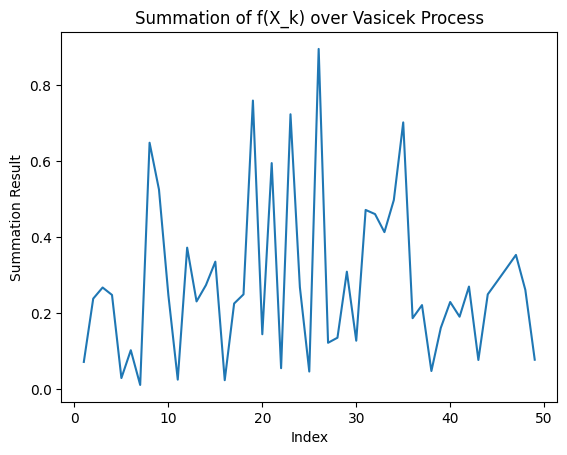

In [28]:
def calculate_sum(n, f, kappa=1, theta=1, sigma=0.5, X0=0.05):
    """
    Calculate the summation: (1/n) * sum_{k=0}^n f(X_k), where X_k is generated by the Vasicek model.
    
    :param n: Number of steps in the discretization
    :param f: Function to apply to each X_k
    :param kappa: Speed of mean reversion
    :param theta: Long-term mean level
    :param sigma: Volatility
    :param X0: Initial value of the process
    :return: The computed summation
    """
    vasicek_process = Vasicek(kappa, theta, sigma)
    
    # Generate one trajectory
    trajectory = vasicek_process.generate(X0, 1, n)[0]  # Extract the first trajectory
    return (1 / n) * sum(f(x) for x in trajectory)
n = 50000
f = lambda x: x**2  # Function to apply to X_k

X = range(1, 50)  # Range of values for plotting
Y = [calculate_sum(n, f) for _ in X]  # Compute the result for each value in X

plt.plot(X, Y)
plt.xlabel("Index")
plt.ylabel("Summation Result")
plt.title("Summation of f(X_k) over Vasicek Process")
plt.show()

In [35]:
import math
from scipy.special import comb

def expected_value_vasicek(n, theta, sigma, kappa):
    """
    Compute the expected value of the Vasicek process at X_n using the closed-form formula.
    
    :param n: Number of steps in the discretization
    :param theta: Long-term mean level
    :param sigma: Volatility
    :param kappa: Speed of mean reversion
    :return: The theoretical expected value
    """
    expected_sum = 0
    for k in range(n + 1):
        # Binomial coefficient
        binom_coeff = comb(n, k)
        
        # Factor for theta and sigma
        theta_factor = theta**(n - k)
        sigma_factor = sigma**k / (2 * kappa)**(k/2)
        
        # Expectation of Z^k
        if k % 2 == 0:  # Even powers of Z
            m = k // 2
            # For even k, the expectation of Z^{2m} is (2m-1)!! = (2m-1)*(2m-3)*...*1
            z_expectation = math.factorial(2 * m) // (2**m * math.factorial(m))  # Double factorial calculation
        else:  # Odd powers of Z
            z_expectation = 0
        
        # Add to the summation
        expected_sum += binom_coeff * theta_factor * sigma_factor * z_expectation
    
    return expected_sum


# Parameters for Vasicek
theta = 1
sigma = 0.5
kappa = 1
n = 1

# Compute theoretical expectation
true_value = expected_value_vasicek(n, theta, sigma, kappa)
print("Theoretical Expected Value:", true_value)


Theoretical Expected Value: 1.0
